# Análise exploratória de dados

In [2]:
!pip install plotly


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
# imports libraries
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Coleta de dados

In [4]:
df = sns.load_dataset('exercise')
## df.to_csv('../../data/raw/exercise.csv', index=False)
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


## 2. Tratamento de dados

In [5]:
df = df.iloc[:,1:6]
df['time'] = df['time'].str.replace('min','')
df['time'] = pd.to_numeric(df['time'])
df.to_csv('../../data/processed/exercise.csv', index=False)
df

,id,diet,pulse,time,kind
0,1,low fat,85,1,rest
1,1,low fat,85,15,rest
2,1,low fat,88,30,rest
3,2,low fat,90,1,rest
4,2,low fat,92,15,rest
...,...,...,...,...,...
85,29,no fat,135,15,running
86,29,no fat,130,30,running
87,30,no fat,99,1,running
88,30,no fat,111,15,running


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      90 non-null     int64   
 1   diet    90 non-null     category
 2   pulse   90 non-null     int64   
 3   time    90 non-null     int64   
 4   kind    90 non-null     category
dtypes: category(2), int64(3)
memory usage: 2.7 KB
None


## 3. Descrição dos dados
Segue o link para a descrição dos dados: [Descrição dos dados](https://dainty-froyo-9ce610.netlify.app/data/)

### 3.1 Dicionário de dados

In [7]:
dicionario = pd.read_csv('../../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,id,Um identificador único para cada voluntário,quantitativa,discreta
1,diet,"O tipo de dieta que o voluntário segue, podend...",qualitativa,nominal
2,pulse,"A pulsação do voluntário, medida em batimentos...",quantitativa,contínua
3,time,O tempo em minutos que o voluntário gastou rea...,quantitativa,discreta
4,kind,O tipo de atividade física realizada pelo volu...,qualitativa,nominal


## 4. Perguntas de partida e hipóteses

### 1. Existem dados faltantes, se sim quantos e em quais variáveis?

In [8]:
number_of_na_by_column = df.isnull().sum().loc[lambda x: x > 0]
number_of_na_rows = df.isnull().any(axis=1).sum()

display(number_of_na_by_column)
display(Markdown(
    "---\n"
    f"A partir dessa informação sabemos que as variáveis `{number_of_na_by_column.axes[0].to_list()}`"
    f"contém valores faltantes. Além disso sabemos que temos `{number_of_na_rows}` linhas com valores faltantes."
    "As próximas análises aqui serão realizadas sem considerar os dados faltantes"
    "\n\n ---"
))

df.dropna(inplace=True)

Series([], dtype: int64)

---
A partir dessa informação sabemos que as variáveis `[]`contém valores faltantes. Além disso sabemos que temos `0` linhas com valores faltantes.As próximas análises aqui serão realizadas sem considerar os dados faltantes

 ---

### 2. Qual a distribuição dos dados (variável por variável)?

In [9]:
df.describe(include='all')

,id,diet,pulse,time,kind
count,90.000000,90,90.000000,90.000000,90
unique,NaN,2,NaN,NaN,3
top,NaN,no fat,NaN,NaN,rest
freq,NaN,45,NaN,NaN,30
mean,15.500000,NaN,99.700000,15.333333,NaN
std,8.703932,NaN,14.858471,11.907886,NaN
min,1.000000,NaN,80.000000,1.000000,NaN
25%,8.000000,NaN,90.250000,1.000000,NaN
50%,15.500000,NaN,96.000000,15.000000,NaN
75%,23.000000,NaN,103.000000,30.000000,NaN


##### 2.1 Distribuição das variáveis qualitativas

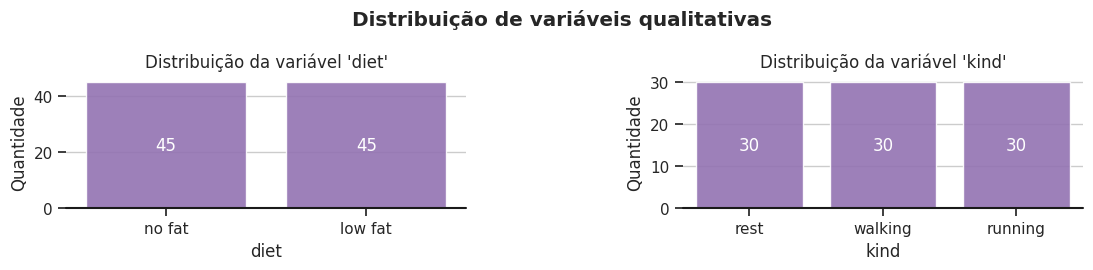

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12,3))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'qualitativa'").variavel.to_list()):
    order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
        order=order
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()

##### 2.2 Distribuição das variáveis quantitativas

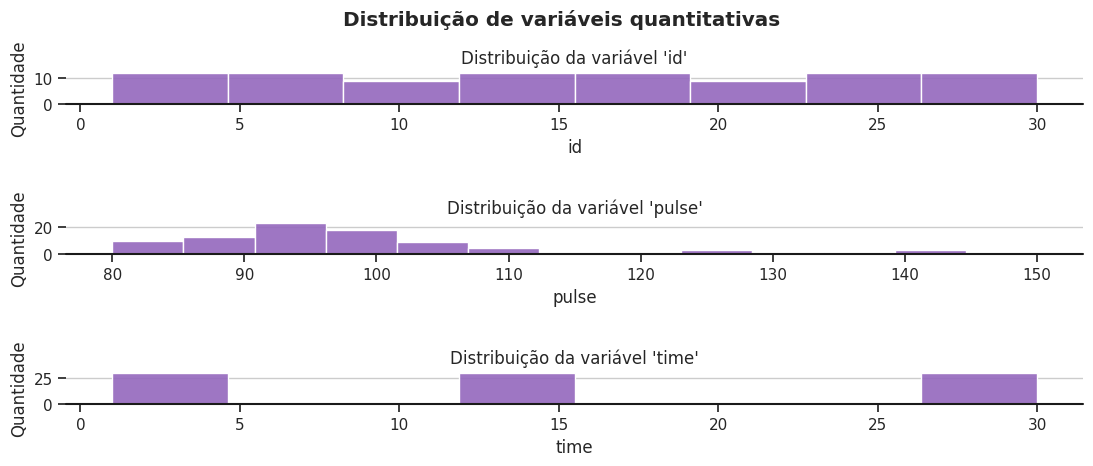

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(12,5))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
    # Customize grid to show only vertical lines
plt.show()

### 3. Existe alguma relação entre o tipo de dieta e a pulsação dos voluntários durante diferentes tipos de atividades físicas?

In [12]:
fig = px.box(df, x="diet", y="pulse", color="kind")
fig.update_traces(quartilemethod="linear")
fig.show()

### 4. Há alguma diferença na pulsação dos voluntários durante diferentes tipos de atividades físicas, considerando o tempo gasto?

In [13]:
fig = px.scatter(df, x="time", y="pulse", color="kind")
fig.show()

### 5. Pulsação dos voluntários varia entre os diferentes tipos de dieta, independentemente do tipo de atividade física?

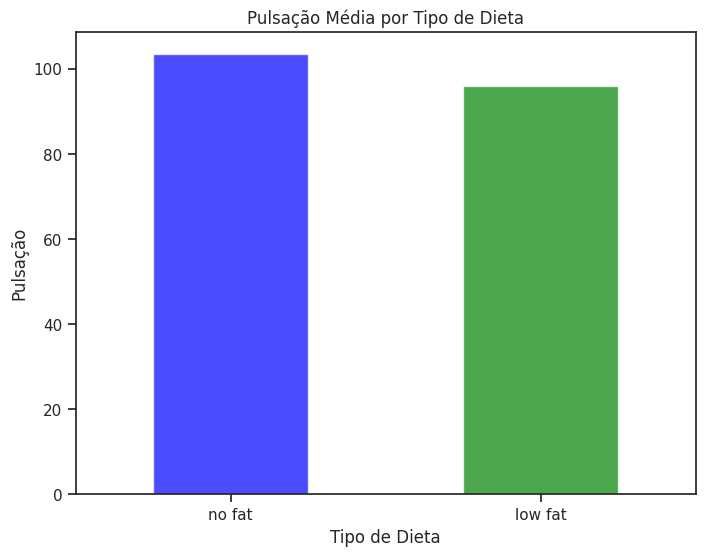

In [14]:
avg_pulse_by_diet = df.groupby('diet')['pulse'].mean()
plt.figure(figsize=(8, 6))
avg_pulse_by_diet.plot(kind='bar', color=['blue', 'green'], alpha=0.7)

plt.title('Pulsação Média por Tipo de Dieta')
plt.xlabel('Tipo de Dieta')
plt.ylabel('Pulsação')
plt.xticks(rotation=0)
plt.show()

### 6. Existe alguma correlação entre o tempo gasto em atividades físicas e a pulsação dos voluntários?

/tmp/ipykernel_73300/381698419.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



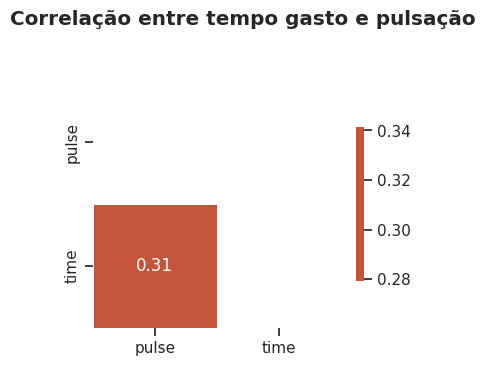

In [15]:
corr = df.iloc[:,1:5].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(4,4))
ax = sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True, 
    fmt=".2f"
)
ax.grid(False)

plt.suptitle(f"Correlação entre tempo gasto e pulsação", fontweight='bold')
plt.show()

/home/balda/avanti-bootcamp/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning:

The figure layout has changed to tight



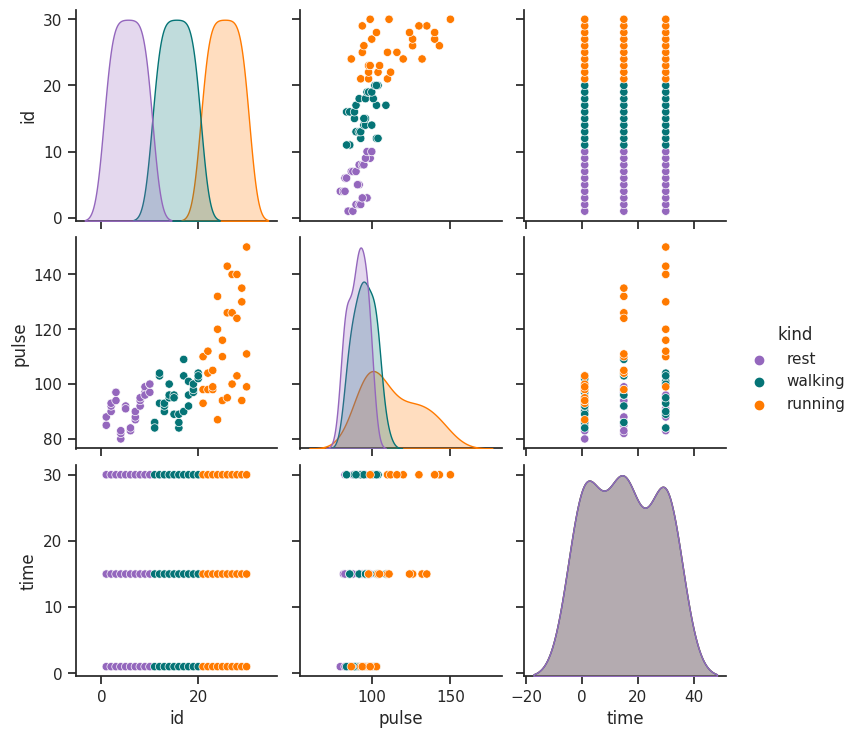

In [16]:
sns.pairplot(df, hue="kind")
plt.show()

In [17]:
scatter_matrix = px.scatter_matrix(df, dimensions=["time", "pulse"], color="diet").show()

In [21]:
tree_map = px.treemap(df, path=['diet', 'kind', 'pulse', 'time']).show()

In [23]:
parallel = px.parallel_categories(df, dimensions=['diet', 'kind']).show()


## 5. Insights

Segue o link para os insights: [Insights](https://dainty-froyo-9ce610.netlify.app/insight/)

## 6. Observação
N/A